<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Arie !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Arie ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Arie dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Proyek SQL

## Deskripsi Proyek

Virus corona yang kehadirannya mengejutkan seluruh dunia telah mengubah rutinitas harian semua orang. Kini, warga kota tidak lagi menghabiskan waktu luangnya di luar rumah seperti pergi ke kafe dan mal. Mereka lebih sering berada di rumah, menghabiskan waktunya dengan membaca buku. Hal ini pun mendorong perusahaan startup untuk mengembangkan aplikasi baru bagi para pecinta buku. Anda telah diberi sebuah database dari salah satu perusahaan yang bersaing dalam industri ini. Database tersebut berisi data tentang buku, penerbit, penulis, serta rating dan ulasan pelanggan atas buku terkait. Informasi ini akan digunakan dalam membuat penawaran harga untuk sebuah produk baru.

## Deskripsi Data

Terdapat 5 dataset yang diberikan.

1. books — Berisi data tentang buku
    - book_id — ID buku
    - author_id — ID penulis
    - title — judul buku
    - num_pages — jumlah halaman
    - publication_date — tanggal penerbitan
    - publisher_id — ID penerbit

2. authors — Berisi data tentang penulis
    - id penulis
    - author — nama penulis

3. publishers — Berisi data tentang penerbit
    - publisher_id — ID penerbit
    - publisher — nama penerbit

4. ratings — Berisi data tentang ulasan pengguna
    - rating_id — ID rating
    - book_id — ID buku
    - username — nama pengguna yang memberi rating buku
    - rating

5. reviews — Berisi data tentang ulasan pelanggan
    - review_id — ID ulasan
    - book_id — ID buku
    - username — nama pengguna yang mengulas buku
    - text — teks ulasan

**Data Diagram :**

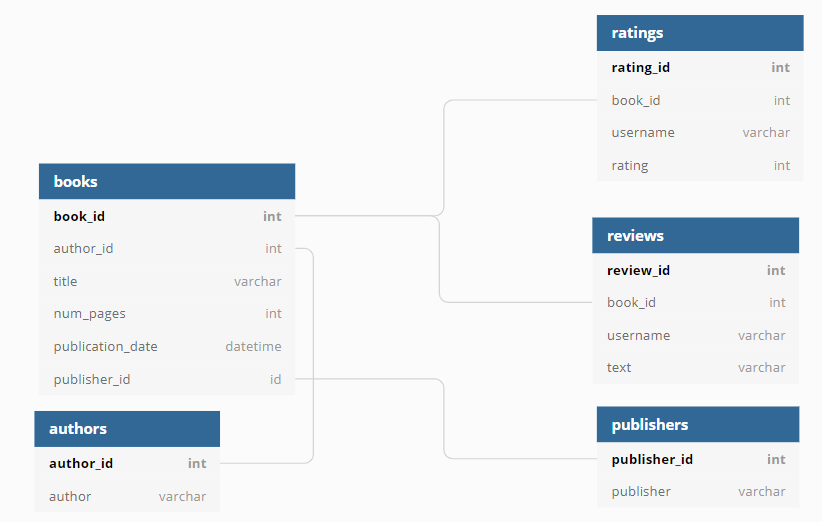

**Tugas :**

- Hitung jumlah buku yang dirilis setelah tanggal 1 Januari 2000.
- Hitung jumlah ulasan pengguna dan rating rata-rata untuk setiap buku.
- Identifikasi penerbit yang telah menerbitkan jumlah buku terbanyak, dengan jumlah halaman lebih dari 50 (hal ini akan membantu kami dalam mengecualikan brosur dan publikasi serupa dari analisis kami).
- Identifikasi penulis dengan rating rata-rata buku tertinggi: temukan buku dengan rating minimal 50.
- Hitung jumlah rata-rata teks ulasan di antara pengguna yang memberi rating terhadap lebih dari 50 buku

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Tujuan :

Untuk membuat keputusan bagi para startup untuk mengembangkan aplikasi baru bagi para pecinta buku dengan memberikan detail tentang dunia buku.

**Impor Libraries :**

In [1]:
# impor library yang diperlukan
import pandas as pd
from sqlalchemy import create_engine

from IPython.display import Markdown, display

In [2]:
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

**Mengakses Database**

In [3]:
db_config = {'user': 'practicum_student',         # nama pengguna
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # kata sandi
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # port koneksi
             'db': 'data-analyst-final-project-db'}          # nama database

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

Koneksi disimpan dalam variabel engine . Anda bisa menjalankan kueri SQL menggunakan Pandas:

pd.io.sql.read_sql(query, con = engine)

**Data Overview**

Kita pelajari tabel-tabelnya. Kita akan menggunakan fungsi sederhana untuk membuat query lebih mudah:

In [4]:
def query(query_string):
    return pd.io.sql.read_sql(query_string, con = engine)

In [5]:
# Daftar tabel dari database
tables = ['books', 'authors', 'publishers', 'ratings', 'reviews']

# Loop untuk membaca data dan menampilkan informasi 5-baris pertama
for table in tables:
    printmd(f"Table: {table}", color='blue')
    
    query_string = f"SELECT * FROM {table}"
    data = query(query_string)
    display(data.info())
    display(data.head(10))
    
    print("\n")

<span style='color:blue'>Table: books</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


None

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
5,6,257,1st to Die (Women's Murder Club #1),424,2005-05-20,116
6,7,258,2nd Chance (Women's Murder Club #2),400,2005-05-20,116
7,8,260,4th of July (Women's Murder Club #4),448,2006-06-01,318
8,9,563,A Beautiful Mind,461,2002-02-04,104
9,10,445,A Bend in the Road,341,2005-04-01,116


<span style='color:blue'>Table: authors</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


None

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
5,6,Alan Paton
6,7,Albert Camus/Justin O'Brien
7,8,Aldous Huxley
8,9,Aldous Huxley/Christopher Hitchens
9,10,Aleksandr Solzhenitsyn/H.T. Willetts


<span style='color:blue'>Table: publishers</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


None

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
5,6,Aladdin
6,7,Aladdin Paperbacks
7,8,Albin Michel
8,9,Alfred A. Knopf
9,10,Alfred A. Knopf Books for Young Readers


<span style='color:blue'>Table: ratings</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


None

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
5,6,3,johnsonamanda,4
6,7,3,scotttamara,5
7,8,3,lesliegibbs,5
8,9,4,abbottjames,5
9,10,4,valenciaanne,4


<span style='color:blue'>Table: reviews</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


None

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...
5,6,3,lesliegibbs,Analysis no several cause international.
6,7,4,valenciaanne,One there cost another. Say type save. With pe...
7,8,4,abbottjames,Within enough mother. There at system full rec...
8,9,5,npowers,Thank now focus realize economy focus fly. Ite...
9,10,5,staylor,Game push lot reduce where remember. Including...


**Kesimpulan :**

- Tabel books berisi 1000 baris informasi buku.
- Tabel authors berisi 636 baris informasi penulis.
- Tabel publishers berisi 340 baris informasi penerbit.
- Tabel ratings berisi 6456 baris informasi rating.
- Tabel reviews berisi 2793 baris informasi ulasan buku.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Tugas

### Tugas 1 : Hitung jumlah buku yang dirilis setelah tanggal 1 Januari 2000

In [6]:
books_2000 = pd.io.sql.read_sql(
    '''
    SELECT COUNT(DISTINCT book_id) 
    FROM books 
    WHERE publication_date > '2000-01-01' 
    ''', con = engine)

display(books_2000)

,count
0,819


**Kesimpulan :**

Jumlah buku yang dirilis setelah tanggal 1 Januari 2000 adalah 819 buku.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Tugas 2 : Hitung jumlah ulasan pengguna dan rating rata-rata untuk setiap buku

In [7]:
query = ''' 
        SELECT 
            books.book_id, 
            books.title, 
            sub.avg_rating,
            sub.user_reviews
        FROM 
            (SELECT
                reviews.book_id AS book_id,
                COUNT(DISTINCT reviews.review_id) AS user_reviews,
                AVG(ratings.rating) AS avg_rating
             FROM
                reviews
                INNER JOIN ratings ON ratings.book_Id = reviews.book_id
             GROUP BY
                 reviews.book_id
             ORDER BY
                 user_reviews DESC,
                 avg_rating DESC) AS sub
            INNER JOIN books ON sub.book_id = books.book_id
        ORDER BY 
            user_reviews DESC,
            avg_rating DESC
        '''

result = pd.io.sql.read_sql(query, con = engine)
display(result)

,book_id,title,avg_rating,user_reviews
0,948,Twilight (Twilight #1),3.662500,7
1,302,Harry Potter and the Prisoner of Azkaban (Harr...,4.414634,6
2,299,Harry Potter and the Chamber of Secrets (Harry...,4.287500,6
3,656,The Book Thief,4.264151,6
4,734,The Glass Castle,4.206897,6
...,...,...,...,...
989,186,Death: The High Cost of Living,3.000000,1
990,446,Moo Baa La La La!,3.000000,1
991,2,1 000 Places to See Before You Die,2.500000,1
992,318,History of Beauty,2.500000,1


**Kesimpulan :**

Jumlah ulasan pengguna dan rating rata-rata untuk setiap buku menunjukkan 994 buku.
Buku berjudul Twilight memiliki jumlah ulasan tertinggi.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Tugas 3 : Identifikasi penerbit yang telah menerbitkan jumlah buku terbanyak, dengan jumlah halaman lebih dari 50

In [8]:
query = ''' 
        SELECT 
            publishers.publisher, 
            COUNT(DISTINCT books.book_id) AS no_of_books
        FROM 
            publishers
        INNER JOIN books ON books.publisher_id = publishers.publisher_id
        WHERE 
            books.num_pages > 50 
        GROUP BY 
            publishers.publisher
        ORDER BY 
            no_of_books DESC
        LIMIT 10
        '''

result = pd.io.sql.read_sql(query, con = engine)
display(result)

,publisher,no_of_books
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Ballantine Books,19
5,Bantam,19
6,Berkley,17
7,Berkley Books,14
8,St. Martin's Press,14
9,Delta,13


**Kesimpulan :**

- Tabel tersebut menunjukkan identifikasi penerbit yang telah menerbitkan jumlah buku terbanyak, dengan jumlah halaman lebih dari 50.
- Diketahui penerbit Penguin Books merupakan penerbit yang telah menerbitkan buku terbanyak yaitu 42 buku

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Tugas 4 : Identifikasi penulis dengan rating rata-rata buku tertinggi: temukan buku dengan rating minimal 50

In [9]:
query = ''' 
        SELECT 
            authors.author AS author_name,
            AVG(ratings.rating) AS avg_rating
        FROM 
            authors
        INNER JOIN books ON books.author_id = authors.author_id
        INNER JOIN ratings ON ratings.book_id = books.book_id
        GROUP BY 
            author_name
        HAVING COUNT(ratings.rating) > 50
        ORDER BY 
            avg_rating DESC
        '''

result = pd.io.sql.read_sql(query, con = engine)
display(result)

,author_name,avg_rating
0,J.K. Rowling/Mary GrandPré,4.288462
1,Agatha Christie,4.283019
2,Markus Zusak/Cao Xuân Việt Khương,4.264151
3,J.R.R. Tolkien,4.240964
4,Roald Dahl/Quentin Blake,4.209677
5,Louisa May Alcott,4.203704
6,Rick Riordan,4.130952
7,Arthur Golden,4.107143
8,Stephen King,4.009434
9,John Grisham,3.971429


**Kesimpulan :**

- Tabel di atas menunjukkan daftar penulis dengan peringkat buku rata-rata tertinggi, yaitu hanya buku-buku yang memiliki minimal 50 peringkat.
- Terdapat 23 penulis yang memiliki buku minimal rating 50.
- Diketahui bahwa penulis J.K. Rowling/Mary GrandPré merupakan penulis dengan peringkat buku tertinggi.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Tugas 5 : Hitung jumlah rata-rata teks ulasan di antara pengguna yang memberi rating terhadap lebih dari 50 buku

In [13]:
query = ''' 
        SELECT AVG(avg_text) AS average_avg_text FROM (
    SELECT 
        reviews.username, 
        COUNT(reviews.review_id) AS avg_text
    FROM 
        reviews
    WHERE 
        reviews.username IN (SELECT 
                                ratings.username
                             FROM 
                                ratings 
                             GROUP BY 
                                ratings.username 
                             HAVING COUNT(ratings.rating_id) > 50)
    GROUP BY 
        reviews.username
) AS subquery;
        '''

result = pd.io.sql.read_sql(query, con=engine)
display(result)

,average_avg_text
0,24.333333


<div class="alert alert-danger">
<b>Code Reviewers's comment v.3</b> <a class="tocSkip"></a>

- hasil 24.3333 harus muncul dari SQL query nya ya kak, jangan pakai syntax dari pandas/numpy
    - silahkan syntax query nya di edit2 supaya hasilnya 24.3333

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.4</b> <a class="tocSkip"></a>

- halo kak masih belum ke ganti ya
    - save dulu sebelum di submit

</div>

**Kesimpulan :**
- Tabel di atas menunjukkan daftar pengguna yang memberi rating terhadap lebih dari 50 buku beserta jumlah rata-rata teks ulasan.
- Terdapat 6 pengguna pada dataset yang telah memberi rating. Dari ke enam pengguna tersebut, rata-rata telah membuat 24.3333 ulasan per pengguna.

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- untuk task ini hasilnya masih kurang tepat ya, jika tepat hasilnya cuma 1 angka saja yaitu 24.333

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- masih belum berubah ya, nilai yg benar harusnya 24.333
    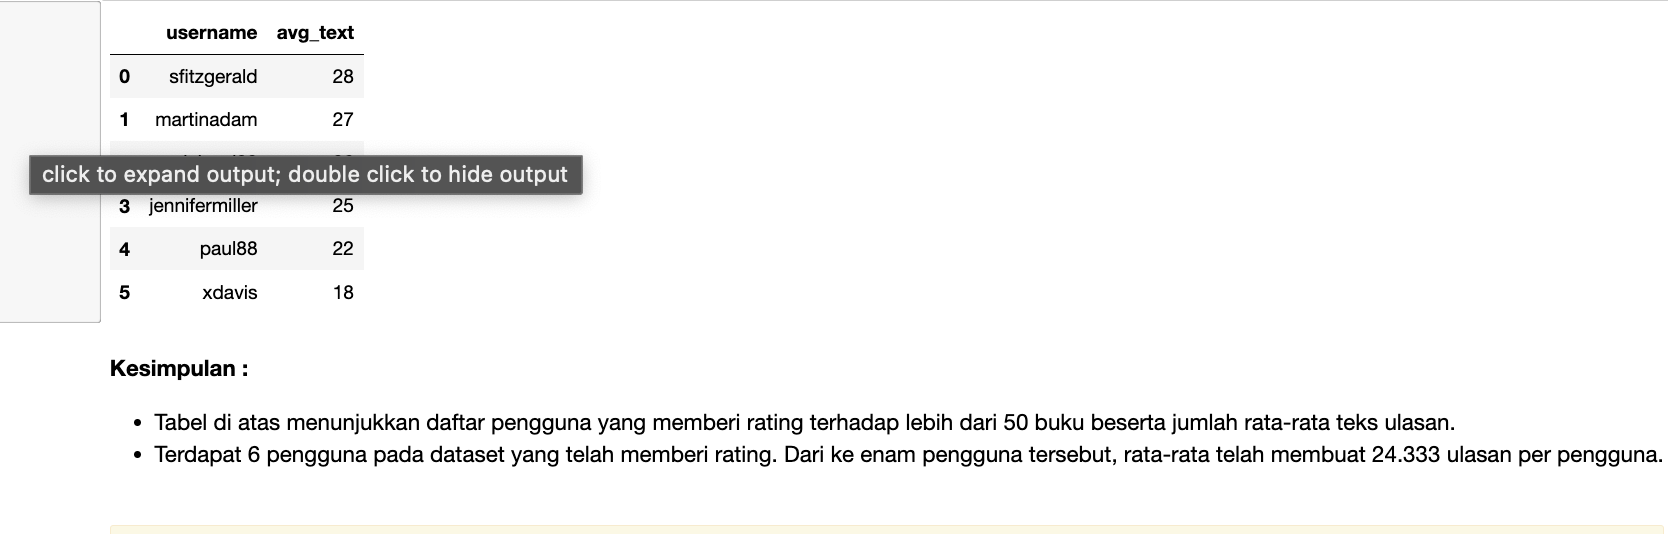

</div>

## Kesimpulan

Di bagian proyek ini, kami menyelidiki dataset. di bawah ini adalah kesimpulan utama kami.

1. Terdapat 1000 item informasi buku dengan 636 penulis, 340 penerbit, 6456 peringkat, serta 2793 ulasan buku.
2. Jumlah buku yang dirilis setelah tanggal 1 Januari 2000 pada dataset terdapat 819 buku.
3. Terdapat 994 buku yang memiliki ulasan pengguna dan peringkat. Buku Twilight memiliki jumlah ulasan tertinggi.
4. Penerbit yang telah menerbitkan jumlah buku terbanyak, dengan jumlah halaman lebih dari 50 adalah penerbit bernama Penguin Books. Buku yang telah diterbitkan yaitu sebanyak 42 buku.
5. Terdapat 23 penulis yang memiliki buku minimal rating 50. J.K. Rowling/Mary GrandPré merupakan penulis dengan peringkat buku tertinggi.
6. Terdapat 6 pengguna yang memberi rating terhadap lebih dari 50 buku. Jumlah rata-rata teks ulasan yaitu 24.3333 ulasan per pengguna.